In [1]:
%matplotlib inline


import pandas as pd
import numpy as np
import datetime

## Weather dataset

In [2]:
weather_dataset = pd.read_csv('dane_pogoda.csv', sep=';')

In [3]:
weather_dataset.head()

,dt,dt_iso,city_id,city_name,lat,lon,temp,temp_min,temp_max,pressure,...,rain_today,snow_1h,snow_3h,snow_24h,snow_today,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,1349096400,2012-10-01 13:00:00 +0000 UTC,3081368,NaN,NaN,NaN,285.99,285.93,286.15,1003,...,0.0,NaN,NaN,NaN,NaN,99,800,Clear,sky is clear,02d
1,1349100000,2012-10-01 14:00:00 +0000 UTC,3081368,NaN,NaN,NaN,285.84,285.37,286.15,1017,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04d
2,1349190000,2012-10-02 15:00:00 +0000 UTC,3081368,NaN,NaN,NaN,285.64,284.82,286.15,1017,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04d
3,1349193600,2012-10-02 16:00:00 +0000 UTC,3081368,NaN,NaN,NaN,284.96,284.26,285.37,1017,...,NaN,NaN,NaN,NaN,NaN,99,500,Rain,light rain,10d
4,1349197200,2012-10-02 17:00:00 +0000 UTC,3081368,NaN,NaN,NaN,284.81,284.26,285.15,1017,...,NaN,NaN,NaN,NaN,NaN,75,803,Clouds,broken clouds,04n


In [4]:
year2015 = pd.date_range(datetime.datetime(2015, 4 , 28, 11),datetime.datetime(2015, 11, 30, 23), freq='H')
year2016 = pd.date_range(datetime.datetime(2016, 3 , 1, 0),datetime.datetime(2016, 11, 30, 23), freq='H')


In [5]:
dates_frame = pd.DataFrame({'date':year2015.append(year2016)})

In [6]:
weather_dataset['dt_iso'].head()

0    2012-10-01 13:00:00 +0000 UTC
1    2012-10-01 14:00:00 +0000 UTC
2    2012-10-02 15:00:00 +0000 UTC
3    2012-10-02 16:00:00 +0000 UTC
4    2012-10-02 17:00:00 +0000 UTC
Name: dt_iso, dtype: object

In [7]:
weather_dataset['correct_pl_date'] = pd.to_datetime(weather_dataset['dt_iso'], format="%Y-%m-%d %H:%M:%S +0000 UTC") + pd.DateOffset(hours=2)

In [8]:
weather_dataset.drop_duplicates(subset=['correct_pl_date'], inplace=True)

In [9]:
merged_dataset = pd.merge(left=dates_frame, right=weather_dataset, left_on='date', right_on='correct_pl_date', how='left')

In [10]:
merged_dataset.isnull().sum()

date                       0
dt                      1041
dt_iso                  1041
city_id                 1041
city_name              11797
lat                    11797
lon                    11797
temp                    1041
temp_min                1041
temp_max                1041
pressure                1041
sea_level              11797
grnd_level             11797
humidity                1041
wind_speed              1041
wind_deg                1041
rain_1h                11589
rain_3h                10625
rain_24h               11797
rain_today             11797
snow_1h                11796
snow_3h                11797
snow_24h               11797
snow_today             11797
clouds_all              1041
weather_id              1041
weather_main            1041
weather_description     1041
weather_icon            1041
correct_pl_date         1041
dtype: int64

In [11]:
col_number = merged_dataset.shape[1]

merged_dataset['is_na_filled'] = 0
for index, row in merged_dataset.iterrows():
    if pd.isnull(row['dt']):
        merged_dataset.iloc[index, 1:col_number] = merged_dataset.iloc[index - 1, 1:col_number]
        merged_dataset.loc[merged_dataset.index[index], 'is_na_filled'] = 1

In [12]:
columns_with_na = list(merged_dataset.loc[:, merged_dataset.isnull().sum() > 0].columns)

In [13]:
merged_dataset.drop(columns_with_na + ['weather_icon', 'dt', 'dt_iso', 'correct_pl_date', 'city_id', 'weather_id'], axis=1, inplace=True)

In [14]:
merged_dataset

,date,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main,weather_description,is_na_filled
0,2015-04-28 11:00:00,287.329,287.329,287.329,999.0,84.0,4.0,333.0,92.0,Rain,light rain,0
1,2015-04-28 12:00:00,287.329,287.329,287.329,999.0,84.0,4.0,333.0,92.0,Rain,light rain,1
2,2015-04-28 13:00:00,286.130,286.130,286.130,1000.0,81.0,7.0,323.0,92.0,Rain,light rain,0
3,2015-04-28 14:00:00,286.130,286.130,286.130,1000.0,81.0,7.0,323.0,92.0,Rain,light rain,1
4,2015-04-28 15:00:00,281.595,281.595,281.595,1002.0,94.0,9.0,329.0,92.0,Rain,light rain,0
5,2015-04-28 16:00:00,281.595,281.595,281.595,1002.0,94.0,9.0,329.0,92.0,Rain,light rain,1
6,2015-04-28 17:00:00,285.267,285.267,285.267,1002.0,77.0,8.0,328.0,92.0,Rain,light rain,0
7,2015-04-28 18:00:00,285.267,285.267,285.267,1002.0,77.0,8.0,328.0,92.0,Rain,light rain,1
8,2015-04-28 19:00:00,279.664,279.664,279.664,1006.0,93.0,11.0,319.0,92.0,Rain,light rain,0
9,2015-04-28 20:00:00,279.664,279.664,279.664,1006.0,93.0,11.0,319.0,92.0,Rain,light rain,0


## Bike rentals

In [15]:
rentals2015 = pd.read_csv('wypozyczenia_wrm-sezon2015.csv', encoding = "ISO-8859-1", sep=';')
rentals2016 = pd.read_csv('wypozyczenia_WRM-sezon2016.csv', encoding = "ISO-8859-1", sep=';')
rentals = pd.concat([rentals2015, rentals2016])

In [16]:
rentals['rental_date'] = pd.to_datetime(rentals['Data wynajmu'], format='%d.%m.%Y %H:%M')

In [17]:
rentals['rental_hour'] = rentals['rental_date'].apply(lambda dt: datetime.datetime(dt.year, dt.month, dt.day, dt.hour, 0))

In [18]:
rentals_per_hour = pd.DataFrame(rentals.groupby('rental_hour').count()['Numer roweru']).reset_index()
rentals_per_hour.columns = ['rental_hour', 'rentals_no']

In [19]:
all_data = pd.merge(left=merged_dataset, right=rentals_per_hour, left_on='date', right_on='rental_hour', how='left')

In [20]:
all_data.loc[all_data['rentals_no'].isnull(),'rentals_no'] = 0

In [21]:
all_data.drop('rental_hour', axis=1, inplace=True)

In [22]:
all_data.shape

(11797, 13)

In [23]:
len(all_data['date'].unique())

11797

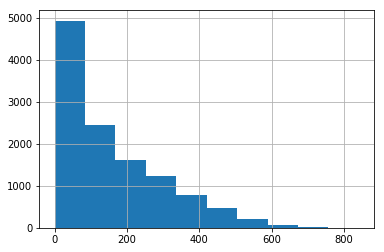

In [24]:
all_data['rentals_no'].hist()

In [25]:
all_data['temp'] = all_data['temp'] - 273.15
all_data['temp_min'] = all_data['temp_min'] - 273.15
all_data['temp_max'] = all_data['temp_max'] - 273.15

In [26]:
all_data['is_weekend'] = all_data['date'].dt.weekday.isin([5,6])

In [27]:
# days without work
free_days = ['2016-01-01', '2016-01-06', '2016-03-27', '2016-03-28', '2016-05-01', '2016-05-03', '2016-05-15', '2016-05-26', '2016-08-15', '2016-11-01', '2016-11-11', '2016-12-25', '2016-12-26',
'2015-01-01', '2015-01-06', '2015-04-05', '2015-04-06', '2015-05-01', '2015-05-03', '2015-05-24', '2015-06-04', '2015-08-15', '2015-11-01', '2015-11-11', '2015-12-25', '2015-12-26']

free_days_dt = [pd.Timestamp(x) for x in free_days]

In [28]:
all_data['bank_holidays'] = all_data.date.apply(lambda date: datetime.datetime(date.year, date.month, date.day) in free_days_dt)


In [29]:
all_data['is_not_working_day'] = all_data['bank_holidays'] | all_data['is_weekend']

In [30]:
all_data['month'] = all_data['date'].apply(lambda x: x.strftime('%b'))

In [31]:
test = all_data[all_data['date'] >= '2016-08-15']
print(test.shape)

(2592, 17)


In [32]:
train = all_data[all_data['date'] < '2016-08-15']
print(train.shape)

(9205, 17)


In [33]:
test.drop('rentals_no', axis=1, inplace=True)

c:\program files\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
print(test.shape)

(2592, 16)


In [35]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

In [36]:
print(train.columns)

Index(['date', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'clouds_all', 'weather_main',
       'weather_description', 'is_na_filled', 'rentals_no', 'is_weekend',
       'bank_holidays', 'is_not_working_day', 'month'],
      dtype='object')


In [37]:
train

,date,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,clouds_all,weather_main,weather_description,is_na_filled,rentals_no,is_weekend,bank_holidays,is_not_working_day,month
0,2015-04-28 11:00:00,14.179,14.179,14.179,999.0,84.0,4.0,333.0,92.0,Rain,light rain,0,6.0,False,False,False,Apr
1,2015-04-28 12:00:00,14.179,14.179,14.179,999.0,84.0,4.0,333.0,92.0,Rain,light rain,1,38.0,False,False,False,Apr
2,2015-04-28 13:00:00,12.980,12.980,12.980,1000.0,81.0,7.0,323.0,92.0,Rain,light rain,0,32.0,False,False,False,Apr
3,2015-04-28 14:00:00,12.980,12.980,12.980,1000.0,81.0,7.0,323.0,92.0,Rain,light rain,1,55.0,False,False,False,Apr
4,2015-04-28 15:00:00,8.445,8.445,8.445,1002.0,94.0,9.0,329.0,92.0,Rain,light rain,0,60.0,False,False,False,Apr
5,2015-04-28 16:00:00,8.445,8.445,8.445,1002.0,94.0,9.0,329.0,92.0,Rain,light rain,1,63.0,False,False,False,Apr
6,2015-04-28 17:00:00,12.117,12.117,12.117,1002.0,77.0,8.0,328.0,92.0,Rain,light rain,0,50.0,False,False,False,Apr
7,2015-04-28 18:00:00,12.117,12.117,12.117,1002.0,77.0,8.0,328.0,92.0,Rain,light rain,1,30.0,False,False,False,Apr
8,2015-04-28 19:00:00,6.514,6.514,6.514,1006.0,93.0,11.0,319.0,92.0,Rain,light rain,0,28.0,False,False,False,Apr
9,2015-04-28 20:00:00,6.514,6.514,6.514,1006.0,93.0,11.0,319.0,92.0,Rain,light rain,0,15.0,False,False,False,Apr
